In [94]:
import numpy as np
import pandas as pd
import math
import lasio
import matplotlib.pyplot as plt  # GRAPHS
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import glob
%matplotlib inline

In [95]:
las = lasio.read('./LAS/T2/T2_Logs.las')
las_DM = lasio.read('./LAS/T2/T2_DM-2077-4158ft.las')
##

In [96]:
df_1 = las.df()
df_1 = df_1[["GR_EDTC", "RHOZ", "DEPTH","AT90","NPHI"]]
df_1['Vsh'] = (df_1.GR_EDTC - 40) / (160 - 40)
df_1['Vclay']=((0.65)*df_1.Vsh) 

mud_density=1.13835   #en g/cc
rhoss=2.65  # g/cc
rhosh=2.75
df_1['grain_density']=((df_1.Vsh*rhosh)+(1-df_1.Vsh)*rhoss)
df_1['porosity']=(df_1.grain_density-df_1.RHOZ)/(df_1.grain_density-mud_density)

df_2 = las_DM.df()
Depth= las_DM.index
df_2 = df_2[["GR_EDTC",'DTCO']]


In [97]:
top=3660
bottom=3895
dt = 2800
bt=3800
temp=((0.0198*df_1.DEPTH)+ 26.921) 
v= 400000
b=0.88
tsup= 25 #F
WS=18000
RWs= (v/tsup/WS)**b
tf=temp
Kt1=6.77
df_1['RW2']=(RWs*(tsup+Kt1))/(temp+Kt1)
print(RWs)

0.9015416186731294


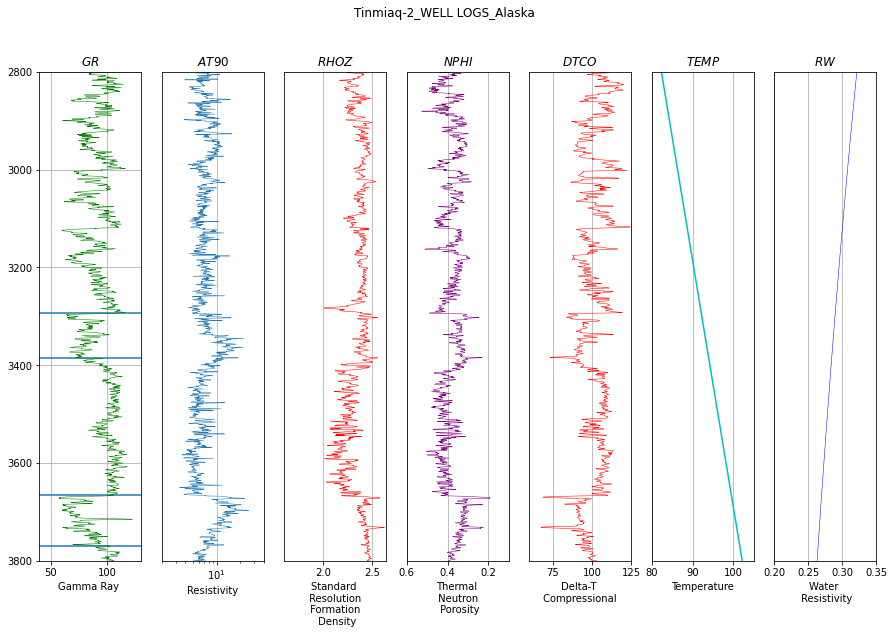

In [98]:
plt.figure(figsize=(15,9))
plt.subplot(171)
plt.plot(df_1.GR_EDTC,df_1.DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130, dt,bt])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3769.49, xmin=0, xmax=130)

plt.hlines(y=3292.25, xmin=0, xmax=130)
plt.hlines(y=3384.75, xmin=0, xmax=130)

plt.hlines(y=2346.92, xmin=0, xmax=130)
plt.hlines(y=2500.65, xmin=0, xmax=130)


plt.subplot(172)
plt.plot(df_1.AT90,df_1.DEPTH,lw=0.5)
plt.axis([2, 40, dt,bt])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(173)
plt.plot(df_1.RHOZ,df_1.DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65, dt,bt])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(174)
plt.plot(df_1.NPHI,df_1.DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1, dt,bt])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(175)
plt.plot(df_2.DTCO,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125, dt,bt])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(176)
plt.plot(temp,df_1.DEPTH,'c')
plt.axis([80, 105, dt,bt])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(177)
plt.plot(df_1.RW2,df_1.DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.2, 0.35, dt,bt])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)



plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

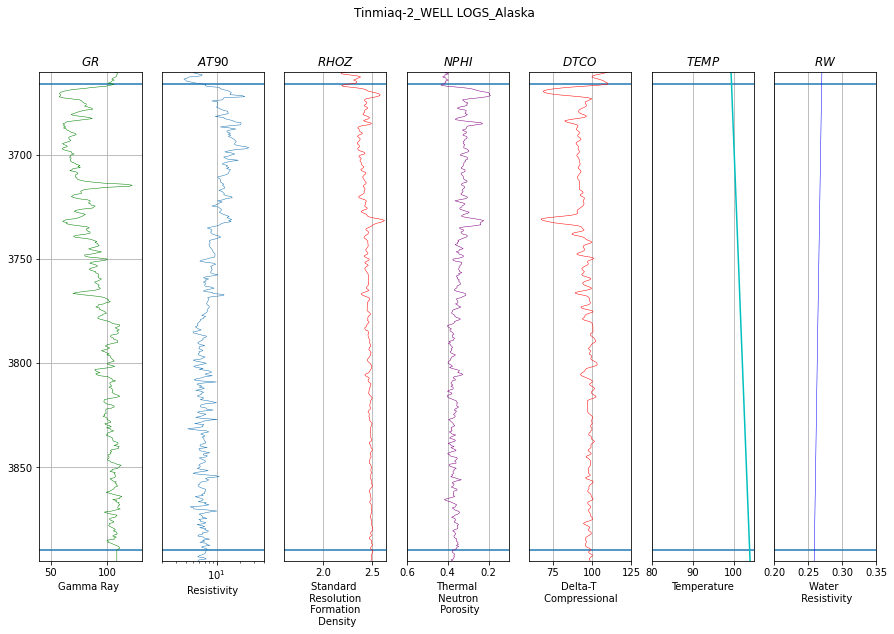

In [99]:
plt.figure(figsize=(15,9))
plt.subplot(171)
plt.plot(df_1.GR_EDTC,df_1.DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130, top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(172)
plt.plot(df_1.AT90,df_1.DEPTH,lw=0.5)
plt.axis([2, 40, top,bottom])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(173)
plt.plot(df_1.RHOZ,df_1.DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65,top,bottom])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(174)
plt.plot(df_1.NPHI,df_1.DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1,top,bottom])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(175)
plt.plot(df_2.DTCO,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(176)
plt.plot(temp,df_1.DEPTH,'c')
plt.axis([80, 105,top,bottom])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(177)
plt.plot(df_1.RW2,df_1.DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.2, 0.35,top,bottom])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)



plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

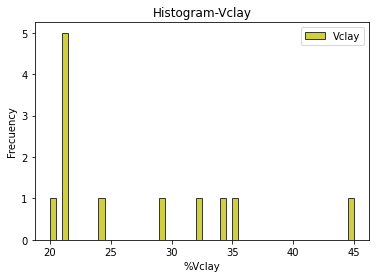

In [100]:
CORE =pd.read_excel('./CORE/CORE.xlsx',sheet_name='XRD')
mask = CORE.Well.isin(['T2'])
T2_Core = CORE[mask]
prof=T2_Core['Depth']
clays=T2_Core['Clays']

xls1 = pd.read_excel ('./CORE/CORE.xlsx', sheet_name='Saturation')
mask = xls1.Well.isin(['T2'])
T2_sat = xls1[mask]
long=T2_sat  ['Depth']
poro=T2_sat  ['PHIT']
grain=T2_sat  ['RHOG']
sw_core=T2_sat  ['Sw']
klinkenberg = T2_sat ['K']

minimo=grain.min()
maximo=grain.max()
c=2.65
d=2.75
norm=(((grain-minimo)*(d-c)/(maximo-minimo))+c)

xls2 = pd.read_excel ('./CORE/CORE.xlsx', sheet_name='Gamma')
mask = xls2.Well.isin(['T2'])
T2_GR = xls2[mask]
h=T2_GR['Depth']
cg1=T2_GR['GR_Scaled']

plt.hist(cl,bins=50,facecolor='y',alpha=0.75,ec='black', label="Vclay")
plt.title('Histogram-Vclay')
plt.xlabel('%Vclay')
plt.ylabel('Frecuency')
plt.legend()


In [101]:
## SW_Archie
## SW=((a*Rw)/(Rt*(Por)^m))^(1/n)
## Rt= df_1.AT90
## Rw= df_1.RW2
a=1
m=2
n=2
Rw=df_1.RW2
Rt=df_1.AT90
Phi=df_1.porosity
F = (a / (Phi**m))
df_1['Sw_a']  = (F *Rw/Rt)**(1/n)
df_1['Sw_a1']= df_1['Sw_a'].apply(lambda x: 1 if x>1 else x)
df_1['Sw_a1'] = df_1['Sw_a1'].replace(np.nan, 1)

In [102]:
dfSh = df_1[df_1['Vsh']>0.5]
Rsh = np.percentile(dfSh['AT90'],20)
print(Rsh)

5.2523


In [103]:
## TERM1= 1/RT - VSH/RSH
df_1['term1']=(1/df_1.AT90)-(df_1.Vsh/Rsh)
## TERM2 = F*RW
term2=(F*df_1.RW2)
## TERM3 = (1-vsh)
term3=(1-df_1.Vsh)
## SW_POUPON = ((TERM1*TERM2)/TERM3))^(1/N)
df_1['Sw_p']=((df_1.term1*term2)/term3)**(1/n)
df_1['Sw_p1']= df_1['Sw_p'].apply(lambda x: 1 if x >1 else x)
df_1['Sw_p1'] = df_1['Sw_p1'].replace(np.nan, 1)


In [104]:
# WAXMAN-SMITS CEC method (does not require VCL) but requires core measurements of CEC 
TempC = (temp-32)/1.8
df_1['SwWS'] = df_1['Sw_p1']
CEC_av = 5
# ===== Waxman Smits Iterations. Reference:  Well Logging for Earth Scientists, Page 663-667 
for i in range(len(Rt)):
    error = 1000
    count1 = 0
    phit = Phi.iloc[i]
    
    if math.isnan(phit):
        df_1['SwWS'][i] = 1
    else:
        Qv = rhosh*(1-phit)*CEC_av/phit/100    # Old Method
        Bcond = 3.83*(1-0.83*np.exp(-0.5/Rw.iloc[i]))  #  Waxman and Thomas, 1974
        BQv = Qv*Bcond
        E = (phit**m)/a
        Ct = 1/Rt.iloc[i]
        Cw = 1/Rw.iloc[i]
        x0 = df_1.iloc[i]['Sw_a1']
        Swguess = x0

        while count1 <= 100 and error > 0.0001:
            count1 = count1+1        
            g =  E*Cw*(Swguess**n) + E*BQv*(Swguess**(n-1)) - Ct
            error = g
            gp = n*E*Cw*(Swguess**(n-1)) + (n-1)*E*BQv*(Swguess**(n-2))
           # print(df_1['SwWS'][i-1])
            df_1['SwWS'].iloc[i] = Swguess-g/gp
            Swguess = df_1['SwWS'].iloc[i]      


NameError: name 'df_1' is not defined

In [105]:
# SIMANDOUX (1963) for shaly-sandy formations, used with saline fm waters Equation solved for n=2
# Input parameters:
    #Rw - water resistivity
    #Rt - true resistivity
    #Phi - porosity
    #Rsh - shale resistivity
    # a - tortuosity factor
    # m - cementation exponent
    # n - saturation exponent
    # Vsh - Volume of shale
## CRAIN'S EQUATION 
#c=(1-df_1.Vsh)*a*(RWs)/(Phi**m)
#d=c*df_1.Vsh/(2*Rsh)
#e=c/Rt
#SWS=((c**2+d)**0.5-d)**(2/n)
df_1['Swsim']=((a*Rw)/(2*(Phi**m)))*(((df_1.Vsh/Rsh)**2+((4*Phi**m)/(a*Rw*Rt)))**(1/2)-(df_1.Vsh/Rsh))
df_1['Swsim1'] = df_1['Swsim'].replace(np.nan, 1)
df_1.head(100)

,GR_EDTC,RHOZ,DEPTH,AT90,NPHI,Vsh,Vclay,grain_density,porosity,RW2,Sw_a,Sw_a1,term1,Sw_p,Sw_p1,SwWS,Swsim,Swsim1
DEPT,,,,,,,,,,,,,,,,,,
3972.0,108.2302,NaN,3971.3870,6.7563,0.4073,0.568585,0.36958,2.706859,NaN,0.254993,NaN,1.0,0.039756,NaN,1.0,1.000000,NaN,1.000000
3971.5,108.2302,NaN,3971.3870,6.7563,0.4073,0.568585,0.36958,2.706859,NaN,0.254993,NaN,1.0,0.039756,NaN,1.0,1.000000,NaN,1.000000
3971.0,108.2302,NaN,3970.9993,6.7563,0.4073,0.568585,0.36958,2.706859,NaN,0.255011,NaN,1.0,0.039756,NaN,1.0,1.000000,NaN,1.000000
3970.5,108.2302,NaN,3970.4998,6.7563,0.4073,0.568585,0.36958,2.706859,NaN,0.255033,NaN,1.0,0.039756,NaN,1.0,1.000000,NaN,1.000000
3970.0,108.2302,NaN,3970.0007,6.7563,0.4073,0.568585,0.36958,2.706859,NaN,0.255056,NaN,1.0,0.039756,NaN,1.0,1.000000,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924.5,108.2302,2.5094,3924.5022,6.3456,0.4073,0.568585,0.36958,2.706859,0.125889,0.257118,1.598973,1.0,0.049335,1.362095,1.0,1.257429,0.946091,0.946091
3924.0,108.2302,2.5035,3924.0039,6.2522,0.3896,0.568585,0.36958,2.706859,0.129651,0.257141,1.564205,1.0,0.051689,1.353825,1.0,1.230489,0.941831,0.941831
3923.5,108.2302,2.5036,3923.5000,6.6411,0.3767,0.568585,0.36958,2.706859,0.129587,0.257164,1.518530,1.0,0.042323,1.225699,1.0,1.180008,0.901131,0.901131


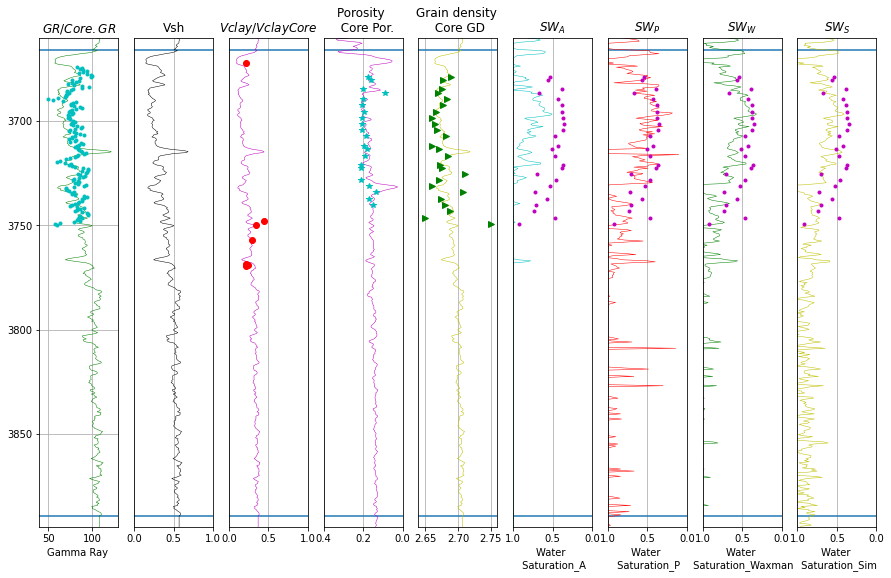

In [106]:
plt.figure(figsize=(15,9))
plt.subplot(191)
plt.plot (df_1.GR_EDTC,df_1.DEPTH,'g',cg1,(h+3),'c.',lw=0.5)
plt.title('$GR/ Core.GR $')
plt.axis([40,130,top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(192)
plt.title('Vsh')
plt.plot (df_1.Vsh,df_1.DEPTH,'black',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(193)
plt.title('$Vclay/Vclay Core$')
plt.plot (df_1.Vclay,df_1.DEPTH,'m',clays,(prof+3),'ro',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(194)
plt.title('Porosity \n  Core Por.')
plt.plot (df_1.porosity,df_1.DEPTH,'m',poro,(long+3),'c*',lw=0.5)
plt.axis([0, 0.4, top,bottom])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(195)
plt.title('Grain density \n Core GD')
plt.plot (df_1.grain_density,df_1.DEPTH,'y',norm,(long+3),'g>',lw=0.5)
plt.axis([2.64, 2.76, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

#Basic Archie
plt.subplot(196)
plt.plot (df_1.Sw_a1,df_1.DEPTH,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_A$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3889.5, xmin=0, xmax=130)
plt.xlim(1, 0)

#Poupon Laminated Model
plt.subplot(197)
plt.plot (df_1.Sw_p1,df_1.DEPTH,'r',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_P$')
plt.axis([0,1.5,top,bottom])
plt.xlabel('Water \n Saturation_P')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)
plt.xlim(1, 0)

#Waxman-Smits
plt.subplot(198)
plt.plot (df_1.SwWS,df_1.DEPTH,'g',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_W$')
plt.axis([0,5,top,bottom])
plt.xlabel('Water \n Saturation_Waxman')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)
plt.xlim(1, 0)

#Simandoux
plt.subplot(199)
plt.plot (df_1.Swsim1,df_1.DEPTH,'y',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_S$')
plt.axis([0,2,top,bottom])
plt.xlabel('Water \n Saturation_Sim')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)
plt.xlim(1, 0)
#Test AC 


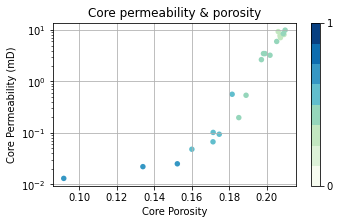

In [107]:
n = 8
ticks = range(n)
data = (poro,klinkenberg)
colors = plt.cm.get_cmap('GnBu',n)(ticks)
lcmap = plt.matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.scatter(poro,klinkenberg, c=sw_core, s=30, alpha=1.2, edgecolor='none', cmap=lcmap)
plt.colorbar(ticks=ticks)
plt.clim(0,1)

plt.title('Core permeability & porosity')
plt.ylabel('Core Permeability (mD)')
plt.yscale('log')
plt.xlabel('Core Porosity')
plt.grid(True)

plt.show()